In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
df = pd.read_csv('predictive_maintenance.csv')

In [25]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [26]:
distinct_value_count = df['Product ID'].nunique()
print("Total count of distinct values in column '{}':".format('Product ID'), distinct_value_count)

Total count of distinct values in column 'Product ID': 10000


In [4]:
type_mapping = {'L': 1, 'M': 2, 'H': 3}

df['Type Mapped'] = df['Type'].map(type_mapping)

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type Mapped
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,2
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,1


In [6]:
df = df.sort_values(by='Target', ascending=False)

In [7]:
dfMod = df.head(340)

dfRem = df.iloc[107:]
dfRem = dfRem.sample(n=1000)

df = pd.concat([dfMod, dfRem])

df = df.sample(frac=1)

In [8]:
df = df.drop(['Product ID','Type','Failure Type'], axis=1)

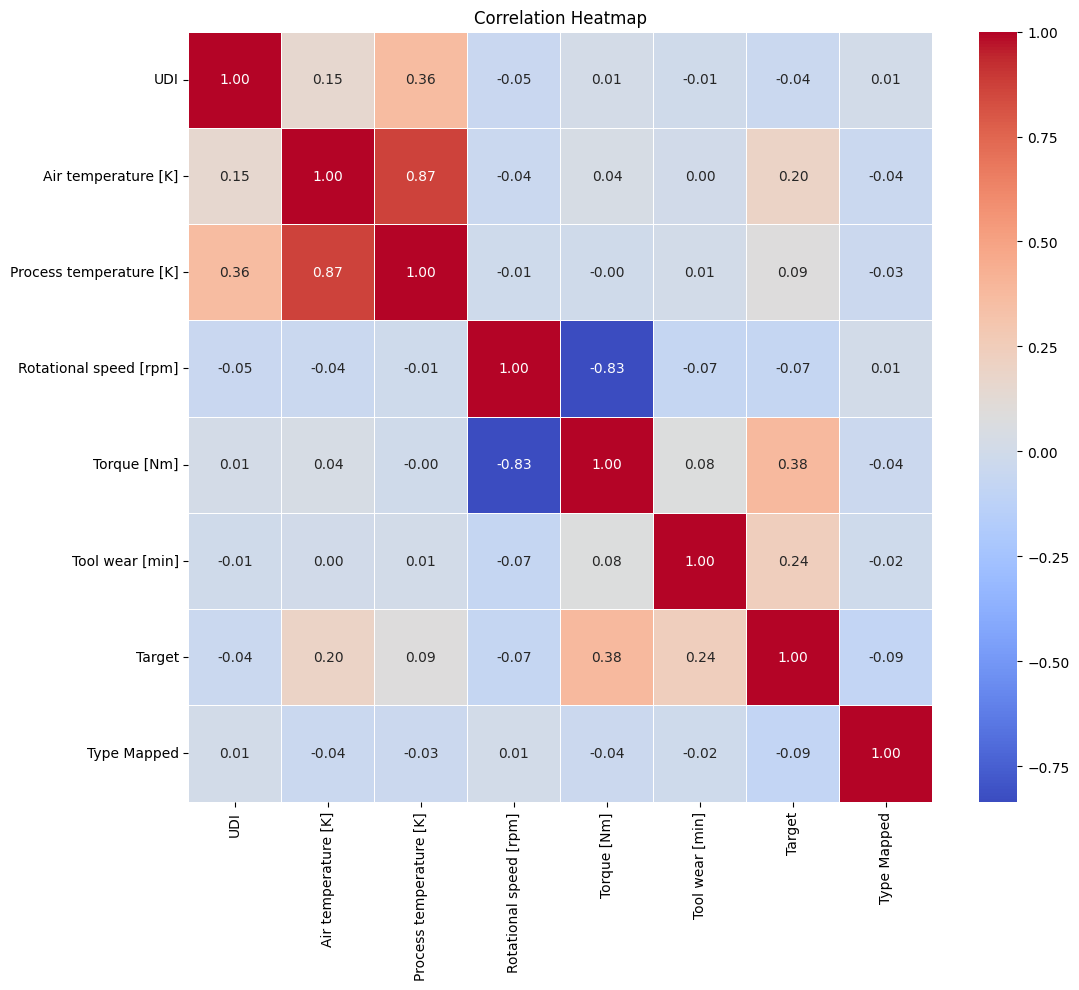

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features_to_scale = df[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]

# Initialize the MinMaxScaler
standard_scaler = StandardScaler()

# Fit and transform the selected features using MinMaxScaler
scaled_features_standard = standard_scaler.fit_transform(features_to_scale)

# Replace the original columns with the scaled columns in the DataFrame
df[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']] = scaled_features_standard

df.head(10)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type Mapped
3583,3584,0.760189,0.412997,0.929675,-1.052418,0.225394,0,1
9767,9768,-0.773566,-0.324534,0.153161,-0.593473,-1.459558,0,1
1108,1109,-1.732163,-1.799596,-0.090533,0.276106,-0.902922,0,1
9590,9591,-0.485987,0.211853,-0.829873,0.775308,-1.263983,0,2
4164,4165,0.951908,0.345949,-0.743135,0.412984,-0.135667,1,1
5352,5353,1.527066,1.821011,0.264681,-0.488802,-0.075491,0,2
5595,5596,1.191558,1.284625,1.726841,-1.688499,-0.707347,0,2
9822,9823,-0.821496,-0.458630,-0.685309,1.491906,1.037781,1,1
7087,7088,0.185031,0.144804,0.504244,-0.955798,1.489108,1,1
8344,8345,-0.677707,-0.257485,0.343159,-0.158684,0.766985,0,1


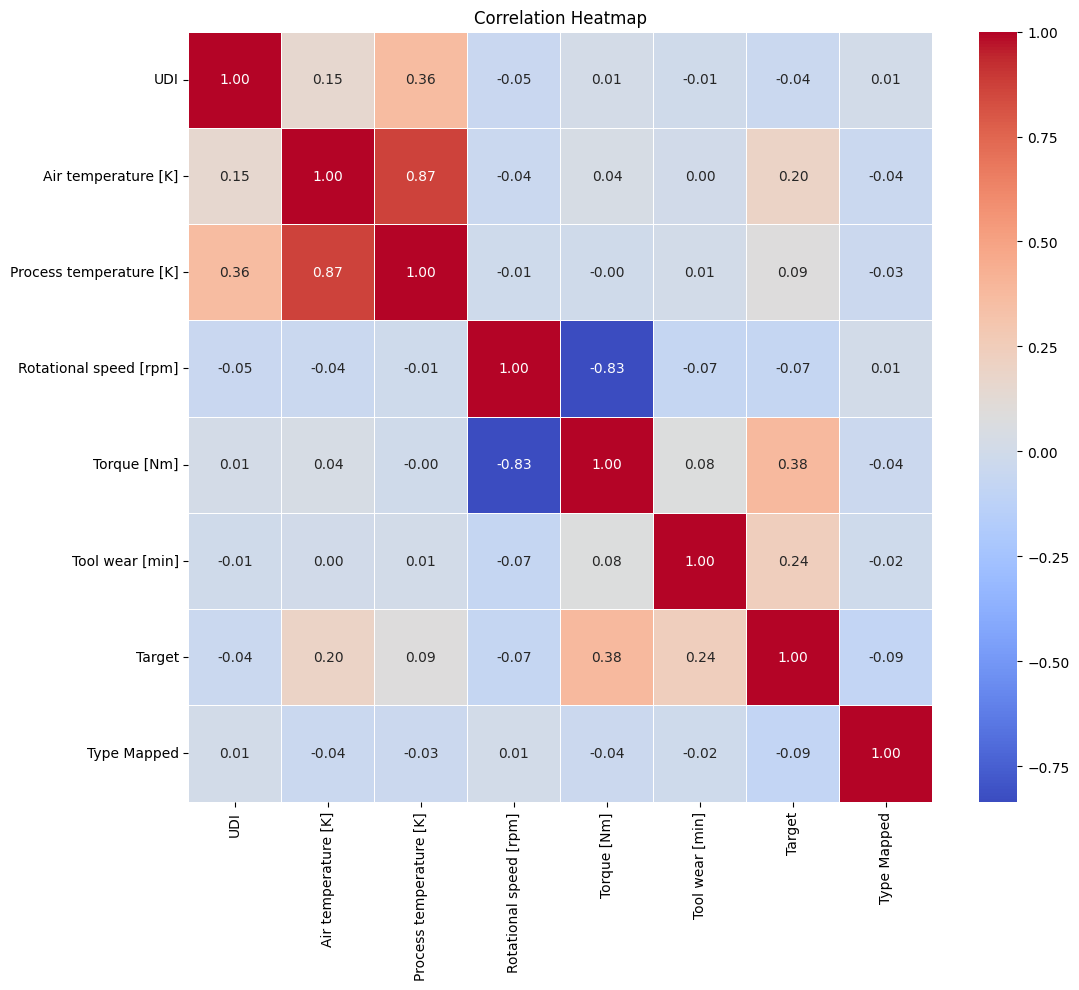

In [11]:
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
X = df.drop(['Target','UDI'], axis=1)
y = df['Target']

In [13]:
'''from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Target')], axis=1)

df = df.sample(frac=1)

df.head(10)'''

"from imblearn.over_sampling import SMOTE\n\nsmote = SMOTE()\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\ndf = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Target')], axis=1)\n\ndf = df.sample(frac=1)\n\ndf.head(10)"

In [14]:
class_distribution = df['Target'].value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Target
0    978
1    362
Name: count, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
#class_weights = dict(zip([0, 1], (len(y) / (2 * y.value_counts())).values))

In [17]:
rf_classifier = RandomForestClassifier()

In [18]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = rf_classifier.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9552238805970149


In [21]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[185   7]
 [  5  71]]


In [22]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       192
           1       0.91      0.93      0.92        76

    accuracy                           0.96       268
   macro avg       0.94      0.95      0.95       268
weighted avg       0.96      0.96      0.96       268

